# Practice Python coding
## Analysis of rental prices using Zillow pricing dataset from Kaggle
### Link provided below:

The following are Python codes to install the packages needed for this work

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import *
from ipywidgets import interact
plt.style.use('seaborn-colorblind')

# This makes sure that graphs render in your notebook.
%matplotlib inline

In [2]:
zrent = pd.read_csv('Zillow_Pricing_Data.csv')

In [ ]:
zrent.head(10)

In [3]:
zrent = zrent.melt(id_vars=['City Code', 'City','Metro','County','State','Population Rank'], var_name='date')

In [ ]:
zrent.sort_values(['State', 'City', 'Metro', 'County', 'date'])

In [4]:
zrent['month'] = zrent['date'].str[:3]
zrent['year'] = zrent['date'].str[4:6]
zrent = zrent.rename(columns={"value": "median_price"})

In [5]:
zrent['year'] = '20' + zrent['year'].astype(str)

In [6]:
zrent['MoYr'] = zrent['month'] + ' ' + zrent['year']

In [7]:
zrent['date'] =  pd.to_datetime(zrent['MoYr'])

In [8]:
zrent = zrent.drop(columns=['MoYr'])

In [9]:
zrent = zrent.sort_values(['State', 'City', 'Metro', 'County', 'date'])

In [10]:
zrent.set_index('date', inplace=True)

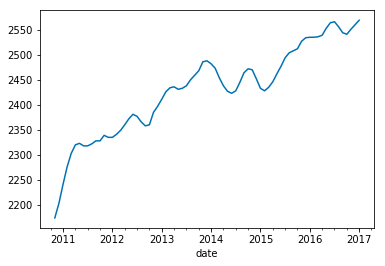

In [11]:
zrent[(zrent.State == 'DC')].median_price.plot();
#deaths.deaths.plot(figsize=(16,8));

In [ ]:
!python -m pip install plotly

In [12]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

In [13]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#print __version__ # requires version >= 1.9.0

In [14]:
init_notebook_mode(connected=True)

In [20]:
plotly.offline.init_notebook_mode(connected=True)

In [ ]:
iplot([{"x": [1, 2, 3], "y": [3, 1, 6]}])

In [ ]:
# Create a trace
x = zrent.groupby(['State','City','year']).median_price.mean()
x = x.to_frame().reset_index()
x = x[(x.State == "CA") & (x.year == "2016")]
x = x.median_price

y = zrent.groupby(['State','City','year']).median_price.mean()
y = y.to_frame().reset_index()
y = y[(y.State == "CA") & (y.year == "2015")]
y = y.median_price

trace = go.Scatter(
    x = x.values,
    y = y.values,
    mode = "markers"
)

data=[trace]
layout=go.Layout(title="First Plot", xaxis={'title':'California Rental Prices in 2016'}, yaxis={'title':'California Rental Prices in 2015'})
figure=go.Figure(data=data,layout=layout)

# Plot and embed in ipython notebook!
iplot(figure, filename='basic-scatter')

In [15]:
x = zrent.groupby(['State','City','year']).median_price.mean()
x = x.to_frame().reset_index()
x = x[(x.State == "CA") & (x.year == "2016")]
x = x.rename(columns = {'median_price':'price_2016'})
x = x.drop(columns = ['year'])
y = zrent.groupby(['State','City','year']).median_price.mean()
y = y.to_frame().reset_index()
y = y[(y.State == "CA") & (y.year == "2015")]
y = y.rename(columns = {'median_price':'price_2015'})
y = y.drop(columns = ['year'])
data = pd.merge(x, y, how = 'left', left_on=['City','State'], right_on = ['City','State'])
data

,State,City,price_2016,price_2015
0,CA,Acton,2486.333333,2331.916667
1,CA,Adelanto,1172.833333,1119.083333
2,CA,Agoura Hills,3560.000000,3302.500000
3,CA,Aguanga,1806.500000,1708.666667
4,CA,Ahwahnee,1311.166667,1286.416667
5,CA,Alameda,3351.500000,3104.250000
6,CA,Alamo,6147.416667,5918.166667
7,CA,Albany,3320.500000,3106.666667
8,CA,Alhambra,2411.833333,2310.083333
9,CA,Aliso Viejo,2731.083333,2579.916667


In [ ]:
data.describe()

In [16]:
l= []
y= []
N= 743
c= ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 743, N)]
for i in range(int(N)):
    y.append((2000+i))
    trace0= go.Scatter(
        x= data['price_2015'],
        y= data['price_2016'],
        mode= 'markers',
        marker= dict(size= 14,
                    line= dict(width=1),
                    color= c[i],
                    opacity= 0.3
                   ),name= y[i],
        text= data['City']) # The hover text goes here... 
    l.append(trace0);



In [17]:
layout= go.Layout(
    title= 'California Rental Prices (2015 - 2016)',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Average Rent in 2015',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Average Rent in 2016',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)

In [21]:
fig= go.Figure(data=l, layout=layout)
iplot(fig)

In [ ]:
!conda update python

In [ ]:
l= []
y= []
#data= pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv")
# Setting colors for plot.
N= 53
c= ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]


In [ ]:
for i in range(int(N)):
    y.append((2000+i))
    trace0= go.Scatter(
        x= data['Rank'],
        y= data['Population']+(i*1000000),
        mode= 'markers',
        marker= dict(size= 14,
                    line= dict(width=1),
                    color= c[i],
                    opacity= 0.3
                   ),name= y[i],
        text= data['State']) # The hover text goes here... 
    l.append(trace0);

layout= go.Layout(
    title= 'Stats of USA States',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Population',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Rank',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)



In [ ]:
fig= go.Figure(data=l, layout=layout)
iplot(fig)

In [ ]:
x = zrent[(zrent.State = 'CA') & (zrent.year = 2014)].median_price
x = x.to_frame().reset_index()
x = x.drop(columns = ['date'])
x = x.median_price
x.head()
x.dtype

In [ ]:
x = zrent.groupby(['State','City','year']).median_price.mean()
x = x.to_frame().reset_index()
x = x[(x.State == "CA") & (x.year == "2016")]
x = x.median_price
x= x.values
x
#age = age.to_frame().reset_index()
#x = zrent[(zrent.State == 'CA') & (zrent.year == "2014")][['City','median_price']].median_price.mean()


In [ ]:
N = 50
x = np.random.randn(N)
x